### AI6 - Assignment 1 - Linear Regression & Gradient Descent

Lets implement the gradient descent algorithm for a simple linear regression problem. 

It is assumed that you know what Linear Regression is. For a refresher, head here [Simple Linear Regression](https://onlinecourses.science.psu.edu/stat501/node/251/)

For understanding Gradient Descent, watch the lectures titled **C1W2L04, C1W2L09, C1W2L10** in this Youtube playlist.  
[Neural Networks](https://www.youtube.com/watch?v=CS4cs9xVecg&list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0)  

Follow this code tutorial. [Linear Regression with Gradient Descent](https://towardsdatascience.com/linear-regression-using-gradient-descent-in-10-lines-of-code-642f995339c0)  

---


**Data**  
This is a random dataset with just one input variable X and the output y.  
Lets import the data.

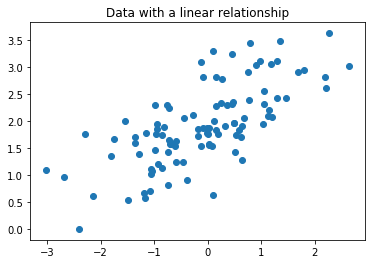

In [1]:
import numpy as np

data = np.loadtxt('data/linear_reg_data.csv', delimiter=',')
X, y = data[:, 0], data[:, 1]

import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(X, y)
plt.title('Data with a linear relationship')
plt.show()

---

**Use these formula for MSE & Gradient Descent**

![MSE](images/mse.gif)
![Gradient Descent Formula](images/gradient_descent_eqn.png)

In [2]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learn_rate=0.001):
    """
    Parameters
    X : array of predictor features
    y : array of outcome values
    m_current, b_current : current values of co-efficients
    epochs : number of iterations
    learn_rate : learning rate

    Returns
    m_current, b_current : values of co-efficients after gradient descent steps
    """
    N = float(len(y))
    for i in range(epochs):
        # Enter your code
        # --------------
        
        y_pred = (X*m_current) + b_current
        
        m_current += learn_rate*(2/N) * np.sum(X*(y-y_pred))
        b_current += learn_rate*(2/N) * np.sum(y-y_pred)
        
        # End your code
        
    return m_current, b_current

**Lets run our code for 100 epochs, i.e. 100 gradient descent steps**

In [3]:
m_current, b_current = linear_regression(X, y, epochs = 100)

**Lets plot and see how our model performs**

In [4]:
# helper function for visualizing our model
def plot_linear_reg(X, y, co_efficients):
    X_min, X_max = X.min(), X.max()    
    counter = len(co_efficients)
    for m_current, b_current in co_efficients:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * m_current + b_current, X_max * m_current + b_current], color = color)
    plt.scatter(X, y, zorder = 3)
    plt.show()

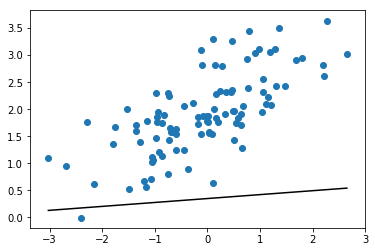

In [5]:
# just creating a list to store co-efficient values
co_efficients = [(m_current, b_current)]

plot_linear_reg(X, y, co_efficients)

**Thats looks bad, lets run it for 1000 iterations**

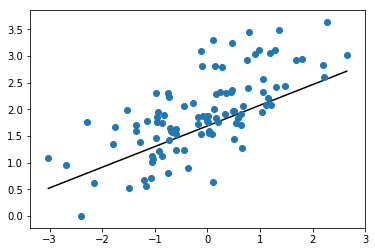

In [6]:
m_current, b_current = linear_regression(X, y, epochs=1000)

co_efficients = [(m_current, b_current)]

plot_linear_reg(X, y, co_efficients)

It seems that our line is moving closer to our data points, so our model is improving.  
It would be cool to see it in action!

---

---

* Lets start with co-efficients set to 0 and run gradient descent steps for 1500 times.
* And visualize our model at every 100th step...

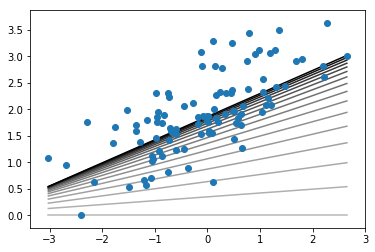

In [7]:
m_current, b_current = 0, 0
co_efficients = [(m_current, b_current)]

for i in range(1, 1500, 100):
    m_current, b_current = linear_regression(X, y, m_current=m_current, b_current=b_current, epochs=100)
    co_efficients.append((m_current, b_current))

plot_linear_reg(X, y, co_efficients)

See that our model starts with the bottom most grey line and it gets better over time. Pretty cool, huh!  

Our final model is represented as a solid black line.

---

Play with epochs and learning rate to see how slow or fast the model learns...

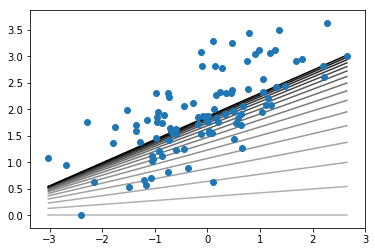

In [8]:
# Playgroud
# We were able to get a decent model learning rate 0.001 and 1500 epochs.
# Let me try with learning rate 0.01 and just 150 epochs.

m_current, b_current = 0, 0
co_efficients = [(m_current, b_current)]

for i in range(1, 150, 10):
    m_current, b_current = linear_regression(X, y, m_current=m_current, b_current=b_current, epochs=10, learn_rate=0.01)
    co_efficients.append((m_current, b_current))

plot_linear_reg(X, y, co_efficients)

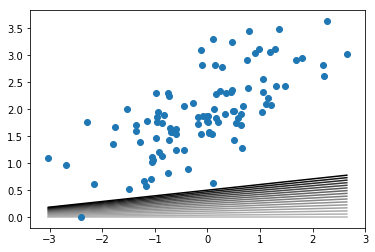

In [9]:
# As, expected similar models in the last two attempts...

# Another attempt with a very small learning rate and 1500 epochs

m_current, b_current = 0, 0
co_efficients = [(m_current, b_current)]

for i in range(1, 1500, 100):
    m_current, b_current = linear_regression(X, y, m_current=m_current, b_current=b_current, epochs=100, learn_rate=0.0001)
    co_efficients.append((m_current, b_current))

plot_linear_reg(X, y, co_efficients)

In [10]:
# thats very slow... thats what? 100kbps?

### Extra Credit 

Calculate **Cost Function** in your model and use convergence to stop the gradient descent algorithm.  

Hint : We used epochs to set the number of iterations of gradient descent steps... Along with that, use the cost value to break the gradient descent algorithm after convergence.

In [11]:
# add Cost Calculation to the linear regression function
# Cost function is Mean Squared Error (MSE)

def linear_regression_with_cost(X, y, m_current=0, b_current=0, epochs=1000, learn_rate=0.001):
    """
    Parameters
    X : array of predictor features
    y : array of outcome values
    m_current, b_current : current values of co-efficients
    epochs : number of iterations
    learn_rate : learning rate

    Returns
    m_current, b_current : values of co-efficients after gradient descent steps
    """
    N = float(len(y))
    for i in range(epochs):
        # Enter your code
        # --------------
        
        y_pred = (X*m_current) + b_current
        
        cost = (np.sum((y-y_pred))**2)/N
        
        m_current += learn_rate*(2/N) * np.sum(X*(y-y_pred))
        b_current += learn_rate*(2/N) * np.sum(y-y_pred)
        
        # End your code
        
    return m_current, b_current, cost

Model converged after 489 epochs with learning rate 0.01
Cost values near the end...  [2.530359801538232e-06, 2.4333575403509109e-06, 2.3400744165633072e-06, 2.2503678128987513e-06, 2.1641005820101707e-06, 2.081140836628189e-06, 2.0013617478040183e-06, 1.9246413508464168e-06, 1.8508623587301775e-06, 1.7799119826572666e-06]


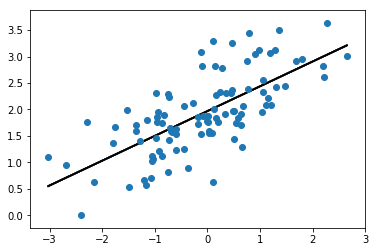

In [12]:
# lets use cost values to terminate gradient descent algorithm
m_current, b_current = 0, 0
co_efficients = [(m_current, b_current)]
costs = [float("inf")]
elapsed_epochs = 0

epochs = 1
learn_rate = 0.01
quit = False
flag = True
for i in range(2000):
    m_current, b_current, cost = linear_regression_with_cost(X, y, m_current=m_current, b_current=b_current, 
                                                             epochs=epochs, learn_rate=learn_rate)
    co_efficients.append((m_current, b_current))
        
    costs.append(cost)
    elapsed_epochs += epochs
    is_converged = flag and np.all(abs(np.ediff1d(costs[-10:])) <= 0.0000001)

    if is_converged:
        print("Model converged after {} epochs with learning rate {}".format(elapsed_epochs, learn_rate))
        print("Cost values near the end... ", costs[-10:])
        flag = False
        if quit:
            break

plot_linear_reg(X, y, co_efficients)

**Model converged about 500 gradient steps**  

Lets plot the cost across weight values

[  2.90056772e-27   2.90056772e-27   2.90056772e-27   2.90056772e-27
   2.90056772e-27   2.90056772e-27   2.90056772e-27   2.90056772e-27
   2.90056772e-27   2.90056772e-27]


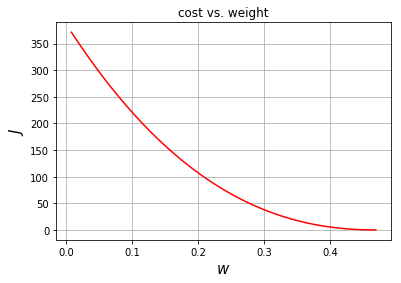

In [13]:
ws = np.array(co_efficients)[:,0]  # weights
cost_ws = np.array(costs)  # costs

print(cost_ws[-10:])
# Plot
plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$J$', fontsize=15)
plt.title('cost vs. weight')
plt.grid()
plt.show()

As expected cost has reached a minimum value and it stays there...